#### Machine Learning Assignment 7

#### Atsu Atakpa

In [1]:
#import libraries
import pandas as pd
import pandas.io.sql
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
import datetime
from dateutil.parser import parse
%matplotlib inline

import missingno as msno

Load the transaction data set
 https://www.kaggle.com/xvivancos/transactions-from-a-bakery/version/1
 

In [2]:
#Reading the data in
bread = pd.read_csv('C:/Users/atsua/OneDrive/Documents/SMU/6. Machine Learning/Assignment 7/BreadBasket_DMS.csv',delimiter = ',') 
bread.tail(5)


,Date,Time,Transaction,Item
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [3]:
# Converting the Date and Time field and splitting them.

#datetime.datetime.strptime(bread.Date,'%Y-%m-%d')
bread['gg'] = [datetime.datetime.strptime(x,'%Y-%m-%d')for x in bread.Date]
bread['tt'] = [datetime.datetime.strptime(x,"%H:%M:%S")for x in bread.Time]
bread['minute'] = bread['tt'].dt.minute
bread['hour'] = bread['tt'].dt.hour
bread['sec'] = bread['tt'].dt.second
bread['Week_Day_name'] = bread['gg'].dt.weekday_name
bread['year'] = bread['gg'].dt.year
bread['month'] = bread['gg'].dt.month
bread['count'] = 1
bread.head()

,Date,Time,Transaction,Item,gg,tt,minute,hour,sec,Week_Day_name,year,month,count
0,2016-10-30,09:58:11,1,Bread,2016-10-30,1900-01-01 09:58:11,58,9,11,Sunday,2016,10,1
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30,1900-01-01 10:05:34,5,10,34,Sunday,2016,10,1
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30,1900-01-01 10:05:34,5,10,34,Sunday,2016,10,1
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30,1900-01-01 10:07:57,7,10,57,Sunday,2016,10,1
4,2016-10-30,10:07:57,3,Jam,2016-10-30,1900-01-01 10:07:57,7,10,57,Sunday,2016,10,1


### Part A Describe the bakery

In [4]:
print("Description of Date",bread.Date.describe())
print("Description of Time", bread.Time.describe())
print("Description of Transactions",bread.Transaction.describe())
print("Description of Items", bread.Item.describe())

Description of Date count          21293
unique           159
top       2017-02-04
freq             302
Name: Date, dtype: object
Description of Time count        21293
unique        8240
top       12:07:39
freq            16
Name: Time, dtype: object
Description of Transactions count    21293.000000
mean      4951.990889
std       2787.758400
min          1.000000
25%       2548.000000
50%       5067.000000
75%       7329.000000
max       9684.000000
Name: Transaction, dtype: float64
Description of Items count      21293
unique        95
top       Coffee
freq        5471
Name: Item, dtype: object


### How many transactions are there?

In [5]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 13 columns):
Date             21293 non-null object
Time             21293 non-null object
Transaction      21293 non-null int64
Item             21293 non-null object
gg               21293 non-null datetime64[ns]
tt               21293 non-null datetime64[ns]
minute           21293 non-null int64
hour             21293 non-null int64
sec              21293 non-null int64
Week_Day_name    21293 non-null object
year             21293 non-null int64
month            21293 non-null int64
count            21293 non-null int64
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 2.1+ MB


In [6]:
bread.Transaction.value_counts()

6474    12
6716    11
6279    11
6412    11
8835    10
9447    10
6045    10
3673    10
7245    10
3799     9
6290     9
6519     9
6038     9
9534     9
3917     8
6048     8
5455     8
7397     8
3529     8
482      8
6056     8
6778     8
5935     8
7602     8
5562     8
8011     8
5807     8
4933     8
5062     8
6617     8
        ..
811      1
2858     1
4263     1
6310     1
165      1
2212     1
4247     1
6294     1
149      1
4777     1
683      1
4793     1
2180     1
4825     1
6888     1
747      1
6904     1
2810     1
8975     1
2132     1
8273     1
4889     1
6214     1
2842     1
795      1
8257     1
8991     1
2100     1
4905     1
2047     1
Name: Transaction, Length: 9531, dtype: int64

###### The total number of transactions were 9531

### What time does their day start?

In [7]:
bread_start = bread.sort_values(by=['Week_Day_name','Time'])
bread_start.head(5)

,Date,Time,Transaction,Item,gg,tt,minute,hour,sec,Week_Day_name,year,month,count
903,2016-11-04,07:32:33,437,Medialuna,2016-11-04,1900-01-01 07:32:33,32,7,33,Friday,2016,11,1
18976,2017-03-24,08:01:27,8663,Cookies,2017-03-24,1900-01-01 08:01:27,1,8,27,Friday,2017,3,1
18977,2017-03-24,08:01:27,8663,Brownie,2017-03-24,1900-01-01 08:01:27,1,8,27,Friday,2017,3,1
18978,2017-03-24,08:01:27,8663,Coffee,2017-03-24,1900-01-01 08:01:27,1,8,27,Friday,2017,3,1
17188,2017-03-10,08:05:41,7854,Coffee,2017-03-10,1900-01-01 08:05:41,5,8,41,Friday,2017,3,1


### What time does their day end?

In [8]:
bread_start = pd.crosstab([ bread_start['Time']],
                       bread_start.Date)
print (bread_start)

Date      2016-10-30  2016-10-31  2016-11-01  2016-11-02  2016-11-03  \
Time                                                                   
01:21:05           0           0           0           0           0   
07:29:57           0           0           0           0           0   
07:32:33           0           0           0           0           0   
07:39:27           0           0           0           0           0   
07:42:27           0           0           0           0           0   
07:44:17           0           0           0           0           0   
07:46:50           0           0           0           0           2   
07:49:01           0           0           0           0           0   
07:49:40           0           0           0           0           0   
07:50:50           0           0           0           0           2   
07:51:20           0           0           2           0           0   
07:54:15           0           0           0           0        

In [9]:
#bread.pivot_table(index = "Time", columns = "Date", aggfunc = 'mean' )

#### Result
From the cross functional table above, it appears that the bakery started '01:21:05'

### What time does their day end?

In [10]:
bread_end = bread.sort_values(by=['Time'], ascending = False)
bread_end = pd.crosstab([ bread_end['Time']],bread_end.Date)
print (bread_end)

Date      2016-10-30  2016-10-31  2016-11-01  2016-11-02  2016-11-03  \
Time                                                                   
01:21:05           0           0           0           0           0   
07:29:57           0           0           0           0           0   
07:32:33           0           0           0           0           0   
07:39:27           0           0           0           0           0   
07:42:27           0           0           0           0           0   
07:44:17           0           0           0           0           0   
07:46:50           0           0           0           0           2   
07:49:01           0           0           0           0           0   
07:49:40           0           0           0           0           0   
07:50:50           0           0           0           0           2   
07:51:20           0           0           2           0           0   
07:54:15           0           0           0           0        

#### Result
From the cross functional table above, it appears that the bakery started '23:38:41'

# What time is the busiest hour?

In [11]:
busiest_hour = bread.hour.value_counts()
busiest_hour.head(5)

11    3216
12    3021
13    2776
10    2763
14    2736
Name: hour, dtype: int64

Their busiest hour was is at 11am. That was the hour at which they had the most transactions

In [12]:
#bread['DT'] = bread['Date'] + bread['Time']
#bread.head()

# How many different things do they sell?

In [13]:
bread.Item.count()

21293

In [14]:
Item_count = bread.Item.unique()
np.shape(Item_count)

(95,)

In [15]:
Item_count

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [16]:
#Removing the NONE from the item count
dd = np.delete(Item_count,[10])
dd

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [17]:
ff = pd.DataFrame(dd)
ff.head(5)

,0
0,Bread
1,Scandinavian
2,Hot chocolate
3,Jam
4,Cookies


#### The total number of unique items sold are 94

### Graph of sales by day

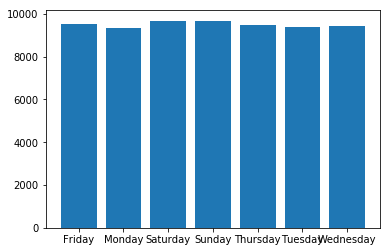

In [18]:
import matplotlib.pyplot as plt

plt.bar(bread.Week_Day_name, bread.Transaction)
plt.show()

In [19]:
df_grouped = bread.groupby(by=['Date'])
#df_grouped['Date2']=pd.to_datetime(df_grouped['Date'])
#df_grouped.describe()

### Part B Describe the customer
#### How many times do they sell every item?

In [20]:
bread.Item.value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

#### What is the relative frequency of sales? (graph)

In [21]:
from scipy import stats

res = stats.relfreq(bread.Transaction, numbins = 25)

In [22]:
res

RelfreqResult(frequency=array([0.02047621, 0.04001315, 0.03991922, 0.04071761, 0.03973137,
       0.03959048, 0.03818156, 0.03888602, 0.03860424, 0.03935566,
       0.04095243, 0.03959048, 0.04132814, 0.04015404, 0.04362936,
       0.0435824 , 0.0463063 , 0.04762128, 0.0457897 , 0.044099  ,
       0.04287794, 0.04095243, 0.04330062, 0.04362936, 0.02071103]), lowerlimit=-200.72916666666666, binsize=403.45833333333326, extrapoints=0)

In [23]:
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)

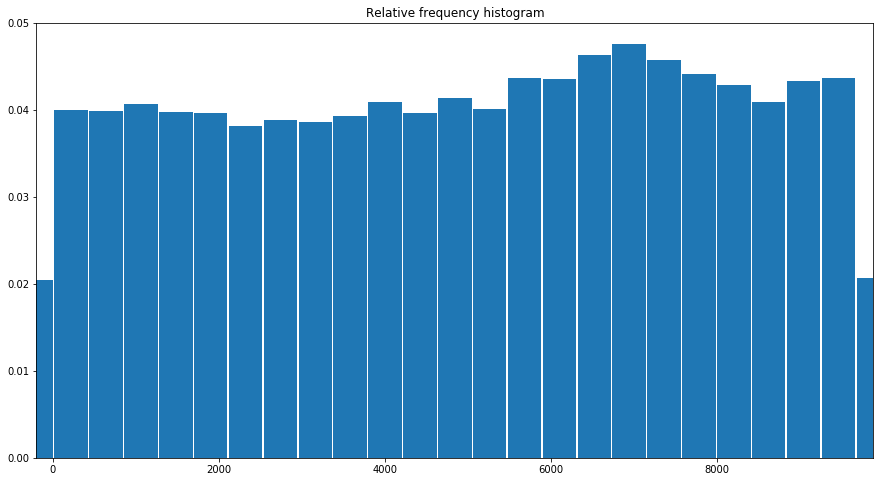

In [24]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, res.frequency, width=res.binsize)
ax.set_title('Relative frequency histogram')
ax.set_xlim([x.min(), x.max()])
plt.show()

#### How often do people buy tea with coffee? How about Coffee and croissant?  Coffee and something from the bakery?

## Tea with Coffee

In [25]:
T_C = bread[(bread.Item == ('Tea')) | (bread.Item == 'Coffee')]
T_C.head(5)

,Date,Time,Transaction,Item,gg,tt,minute,hour,sec,Week_Day_name,year,month,count
7,2016-10-30,10:13:03,5,Coffee,2016-10-30,1900-01-01 10:13:03,13,10,3,Sunday,2016,10,1
15,2016-10-30,10:19:12,7,Coffee,2016-10-30,1900-01-01 10:19:12,19,10,12,Sunday,2016,10,1
16,2016-10-30,10:19:12,7,Tea,2016-10-30,1900-01-01 10:19:12,19,10,12,Sunday,2016,10,1
28,2016-10-30,10:30:14,12,Coffee,2016-10-30,1900-01-01 10:30:14,30,10,14,Sunday,2016,10,1
31,2016-10-30,10:30:14,12,Tea,2016-10-30,1900-01-01 10:30:14,30,10,14,Sunday,2016,10,1


In [26]:
df2 = T_C.groupby(by=['Transaction'])
df2.head(5)

,Date,Time,Transaction,Item,gg,tt,minute,hour,sec,Week_Day_name,year,month,count
7,2016-10-30,10:13:03,5,Coffee,2016-10-30,1900-01-01 10:13:03,13,10,3,Sunday,2016,10,1
15,2016-10-30,10:19:12,7,Coffee,2016-10-30,1900-01-01 10:19:12,19,10,12,Sunday,2016,10,1
16,2016-10-30,10:19:12,7,Tea,2016-10-30,1900-01-01 10:19:12,19,10,12,Sunday,2016,10,1
28,2016-10-30,10:30:14,12,Coffee,2016-10-30,1900-01-01 10:30:14,30,10,14,Sunday,2016,10,1
31,2016-10-30,10:30:14,12,Tea,2016-10-30,1900-01-01 10:30:14,30,10,14,Sunday,2016,10,1
34,2016-10-30,10:31:24,13,Coffee,2016-10-30,1900-01-01 10:31:24,31,10,24,Sunday,2016,10,1
44,2016-10-30,10:37:08,16,Coffee,2016-10-30,1900-01-01 10:37:08,37,10,8,Sunday,2016,10,1
51,2016-10-30,10:49:29,21,Coffee,2016-10-30,1900-01-01 10:49:29,49,10,29,Sunday,2016,10,1
52,2016-10-30,10:49:29,21,Coffee,2016-10-30,1900-01-01 10:49:29,49,10,29,Sunday,2016,10,1
62,2016-10-30,11:03:24,28,Coffee,2016-10-30,1900-01-01 11:03:24,3,11,24,Sunday,2016,10,1


In [27]:
#df1 = DataFrame
T_C.pivot_table(index="Transaction",columns="Item", aggfunc="count")

Date        Time      Week_Day_name       count          gg  \
Item        Coffee  Tea Coffee  Tea        Coffee  Tea Coffee  Tea Coffee   
Transaction                                                                 
5              1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
7              1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
12             1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
13             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
16             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
21             2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
28             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
33             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
34             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
36             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
37             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
38             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
40             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
42             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
44             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
45             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
46             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
48             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
49             2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
55             1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
56             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
58             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
59             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
60             2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
61             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
62             2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
63             1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
65             1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
68             1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
69             NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
...            ...  ...    ...  ...           ...  ...    ...  ...    ...   
9617           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9618           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9623           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9627           2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
9628           1.0  1.0    1.0  1.0           1.0  1.0    1.0  1.0    1.0   
9630           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9632           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9634           2.0  NaN    2.0  NaN           2.0  NaN    2.0  NaN    2.0   
9635           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9636           NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
9649           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9650           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9651           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9653           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9655           NaN  1.0    NaN  1.0           NaN  1.0    NaN  1.0    NaN   
9656           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9657           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9658           1.0  NaN    1.0  NaN           1.0  NaN    1.0  NaN    1.0   
9659      

In [28]:
df2 = pd.crosstab([ T_C['Transaction']],
                       T_C.Item)
df2.head(5)

Item,Coffee,Tea
Transaction,,
5,1,0
7,1,1
12,1,1
13,1,0
16,1,0


In [29]:
df2.Coffee.value_counts()

1    3656
0     878
2     804
3      65
4       3
Name: Coffee, dtype: int64

## How about Coffee and croissant?

In [30]:
C_C = bread[(bread.Item == ('Coffee')) & (bread.Item == 'Croissant')]
C_C2 = C_C.groupby(by=['Transaction'])
C_C2.head()

,Date,Time,Transaction,Item,gg,tt,minute,hour,sec,Week_Day_name,year,month,count


Coffee and Croissant was never bought together

#### What is the average number of items purchased per person?

In [31]:
#df1 = DataFrame
bread['count'] = 1
#bread.head()
bread.pivot_table(index="Item",columns = "count", aggfunc="mean")

,Transaction,hour,minute,month,sec,year
count,1,1,1,1,1,1
Item,,,,,,
Adjustment,938.000000,19.000000,49.000000,11.000000,22.000000,2016.000000
Afternoon with the baker,6500.636364,14.227273,32.227273,2.068182,27.659091,2017.000000
Alfajores,4099.119241,13.162602,31.075881,6.704607,31.024390,2016.495935
Argentina Night,9164.714286,11.000000,48.285714,3.714286,34.571429,2017.000000
Art Tray,3707.289474,12.973684,23.842105,7.842105,27.447368,2016.368421
Bacon,1248.000000,13.000000,1.000000,11.000000,23.000000,2016.000000
Baguette,7298.250000,11.480263,32.473684,2.414474,29.921053,2017.000000
Bakewell,5667.229167,12.729167,27.604167,5.729167,30.270833,2016.625000


#### What hour of the day are there the most sales?

In [32]:
busiest_hour = bread.hour.value_counts()
busiest_hour.head(5)

11    3216
12    3021
13    2776
10    2763
14    2736
Name: hour, dtype: int64

Most of the sale was deduced to occure at 11am. That was the hour at which most of the transactions occured.

#### What day of week are the most sales?

In [33]:
day_sales = bread.Week_Day_name.value_counts()
day_sales = day_sales.sort_values(ascending = False)
day_sales.head(10)

Saturday     4803
Friday       3235
Sunday       3233
Thursday     2719
Tuesday      2480
Wednesday    2429
Monday       2394
Name: Week_Day_name, dtype: int64

The most sales occured on Saturdays. That was the day most transactions occured.

#### How is the business doing?

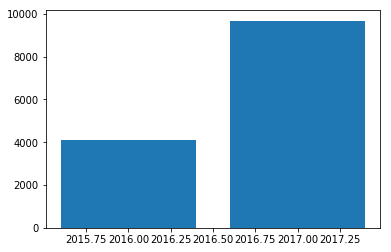

In [34]:
import matplotlib.pyplot as plt

plt.bar(bread.year,bread.Transaction)
plt.show()

In [35]:
bread.year.value_counts()

2017    12732
2016     8561
Name: year, dtype: int64

In [36]:
diff_sale = len(bread[bread.year == 2017]) - len(bread[bread.year == 2016])
diff_sale
#len(bread[bread.year == 2016])/len(bread)*100.0

4171

In [37]:
#Calculating the percentage increase/decrease in sales
diff_sale/len(bread[bread.year == 2016]) * 100.0

48.72094381497489

The percentage increase in sale from 2016 to 2017 was 48.7%.That was a significant increase so to answer the question how the company was doing, based on the increase in sale from the previous year, I think the company is doing very well.

#### How often is there a line with people waiting?

#### How fast can they do transactions? ie should they get another register?

#### Part C.Model the customer behavior?

#### Model the user behavior to help the owner.  Explain why what you are doing will help the owner.

In [51]:
bread2 = bread[['Item','Transaction','count']]

In [52]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
basket = (bread2
          .groupby(['Transaction','Item'])
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

In [53]:
basket

count                                                     \
Item        Adjustment Afternoon with the baker Alfajores Argentina Night   
Transaction                                                                 
1                  0.0                      0.0       0.0             0.0   
2                  0.0                      0.0       0.0             0.0   
3                  0.0                      0.0       0.0             0.0   
4                  0.0                      0.0       0.0             0.0   
5                  0.0                      0.0       0.0             0.0   
6                  0.0                      0.0       0.0             0.0   
7                  0.0                      0.0       0.0             0.0   
8                  0.0                      0.0       0.0             0.0   
9                  0.0                      0.0       0.0             0.0   
10                 0.0                      0.0       0.0             0.0   
11                 0.0                      0.0       0.0             0.0   
12                 0.0                      0.0       0.0             0.0   
13                 0.0                      0.0       0.0             0.0   
14                 0.0                      0.0       0.0             0.0   
15                 0.0                      0.0       0.0             0.0   
16                 0.0                      0.0       0.0             0.0   
17                 0.0                      0.0       0.0             0.0   
18                 0.0                      0.0       0.0             0.0   
19                 0.0                      0.0       0.0             0.0   
20                 0.0                      0.0       0.0             0.0   
21                 0.0                      0.0       0.0             0.0   
22                 0.0                      0.0       0.0             0.0   
23                 0.0                      0.0       0.0             0.0   
24                 0.0                      0.0       0.0             0.0   
25                 0.0                      0.0       0.0             0.0   
26                 0.0                      0.0       0.0             0.0   
27                 0.0                      0.0       0.0             0.0   
28                 0.0                      0.0       0.0             0.0   
29                 0.0                      0.0       0.0             0.0   
30                 0.0                      0.0       0.0             0.0   
...                ...                      ...       ...             ...   
9651               0.0                      0.0       0.0             0.0   
9652               0.0                      0.0       0.0             0.0   
9653               0.0                      0.0       0.0             0.0   
9654               0.0                      0.0       0.0             0.0   
9655               0.0                      0.0       0.0             0.0   
9656               0.0                      0.0       0.0             0.0   
9657               0.0                      0.0       0.0             0.0   
9658               0.0                      0.0       0.0             0.0   
9659               0.0                      0.0       0.0             0.0   
9660               0.0                      0.0       0.0             0.0   
9664               0.0                      0.0       0.0             0.0   
9665               0.0                      0.0       0.0             0.0   
9666               0.0                      0.0       0.0             0.0   
9667               0.0                      0.0       0.0             0.0   
9668               0.0                      0.0       0.0             0.0   
9669               0.0                      0.0       0.0             0.0   
9670               0.0                      0.0       0.0             0.0   
9671               0.0                      0.0       0.0             0.0   
9672         

In [54]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
#basket_sets.drop('NONE', inplace=True, axis=1)

In [55]:
frequent_itemsets = apriori(basket_sets, min_support=0.007, use_colnames=True)

In [56]:
frequent_itemsets

,support,itemsets
0,0.036093,"((count, Alfajores))"
1,0.015948,"((count, Baguette))"
2,0.324940,"((count, Bread))"
3,0.039765,"((count, Brownie))"
4,0.103137,"((count, Cake))"
5,0.012905,"((count, Chicken Stew))"
6,0.475081,"((count, Coffee))"
7,0.019305,"((count, Coke))"
8,0.054034,"((count, Cookies))"
9,0.038926,"((count, Farm House))"


In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((count, Coffee))","((count, Alfajores))",0.475081,0.036093,0.019515,0.041078,1.138116,0.002368,1.005199
1,"((count, Alfajores))","((count, Coffee))",0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,"((count, Pastry))","((count, Bread))",0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
3,"((count, Bread))","((count, Pastry))",0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
4,"((count, Brownie))","((count, Coffee))",0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799


In [58]:
rules[ (rules['lift'] >= 1.0) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"((count, Alfajores))","((count, Coffee))",0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
7,"((count, Cake))","((count, Coffee))",0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
17,"((count, Cookies))","((count, Coffee))",0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053
18,"((count, Hot chocolate))","((count, Coffee))",0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276
21,"((count, Juice))","((count, Coffee))",0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
23,"((count, Medialuna))","((count, Coffee))",0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
27,"((count, NONE))","((count, Coffee))",0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
29,"((count, Pastry))","((count, Coffee))",0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
30,"((count, Sandwich))","((count, Coffee))",0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
32,"((count, Scone))","((count, Coffee))",0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


In [59]:
#basket.describe()

Market basket analysis is an appropriate modeling technique I explored to be able to help the bakey owner. Association rule analysis gives us insights as to which items can be paired together to hopefully boast sales. Assocition analysis is used to find interesting patterns or combinations.

* Analysis Results
         Results shows that some of the frequent items that were bought together and should be packaged together to be sold are:
             Coffee and Toast
             Coffee and Tiffin
             Coffee and Spanish Brunch
             Coffee and Scone
             Coffee and Sandwich
             Coffee and Pastry
             Coffee and Medialuna
             Coffee and Juice
             Coffee and Hot Chocolate
             Coffee and Cookies
             Coffee and Cake
             Coffee and Alfajores             
   
For the association rule analysis the based on confidence, the result with the best pairing was "Toast" and "Coffe" followed by "Spanish Brunch" and "Coffee". The result with the least confidence greater than 50% by the way was "Hot Chocolate" and "Coffee".

#### They run out of coffee after 500 cups.  They want to get it at the last possible minute so its fresh.  But it takes 3 days to arrive.  When should they order?

http://pbpython.com/market-basket-analysis.html